<p style="background-color: limegreen; font-family: arial; font-size: 250%; text-align: center; border-radius: 15px 50px; color: white;">
Spotify and <span style="color: red;">YouTube</span> Analysis
</p>

### EDA IN PYTHON

***EDA (Exploratory Data Analysis) veri setinin ilk keşfi ve analizi için kullanılan bir yöntemdir. Veri setindeki eksiklikler, aykırı değerler ve genel eğilimleri anlamak için önemlidir. Ayrıca veriyi görselleştirme ve temel istatistiksel analizler yaparak daha derin bir içgörü sağlar.***

**EDA'nın Uygulama Alanları**

1.) Hatalar ve anormallikler EDA kullanılarak tespit edilebilir.

2.) Çeşitli veri türleri hakkında yeni görüşler elde edebiliriz.

3.) Verideki aykırı değerler tespit edilebilir.

4.) EDA kullanarak varsayımları test edebiliriz.

5.) Önemli faktörler onu kullanarak tanımlanabilir.

6.) Çeşitli veri arasındaki ilişkiyi anlayabiliriz.

7.) Veri, görselleştirme süreci kullanılarak kendini ifade edebilir.

In [9]:
#kütüphanelerimizi yüklüyorum.
import pandas as pd 
import numpy as np
from scipy import stats
import seaborn as sns 
sns.set_theme(color_codes=True)
import datetime as dt 
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore')

In [10]:
# CSV dosyasını yükleme
data = 'C:/Users/bugra/OneDrive/Desktop/Kodlasam bitirme projesi/Spotify_Youtube.csv'
df = pd.read_csv(data)
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [12]:
# toplam boş verileri kontrol ediyorum.
df.isnull().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [13]:
# sütunlara bakıyoruz
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [15]:
# unique değerleri kontrol ediyorum.
df.nunique()

Unnamed: 0          20718
Artist               2079
Url_spotify          2079
Track               17841
Album               11937
Album_type              3
Uri                 18862
Danceability          898
Energy               1268
Key                    12
Loudness             9417
Speechiness          1303
Acousticness         3138
Instrumentalness     4012
Liveness             1536
Valence              1293
Tempo               15024
Duration_ms         14690
Url_youtube         18154
Title               18146
Channel              6714
Views               19245
Likes               17939
Comments            10485
Description         17395
Licensed                2
official_video          2
Stream              18461
dtype: int64

In [18]:
#işime yaramayan sütunları siliyorum.
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['Url_spotify'], axis=1, inplace=True)
df.drop(['Uri'], axis=1, inplace=True)
df.drop(['Url_youtube'], axis=1, inplace=True)
df.drop(['Title'], axis=1, inplace=True)
df.drop(['Description'], axis=1, inplace=True)


In [23]:
#daha anlaşılır ve okunabilir olması için isimlerini değiştiriyorum.
df.rename(columns={'official_video':'Official Video'},inplace=True)
df.rename(columns={'Album_type':'Album Type'},inplace=True)
df.rename(columns={'Duration_ms':'Duration'},inplace=True)

In [25]:
#Veri çerçevesinde yinelenen satırları bulma
df.duplicated().sum()

0

In [27]:
#veri bütünlüğü korumak için ve analizlerin daha doğru sonuç vermesi için null değerleri dropluyorum.
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

Artist              0
Track               0
Album               0
Album Type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration            0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
Official Video      0
Stream              0
dtype: int64

In [31]:
#burada satıların veri tiplerine bakıyorum değiştirmem gereken bir veri tipi var ise; 
df.dtypes

Artist               object
Track                object
Album                object
Album Type           object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration            float64
Channel              object
Views               float64
Likes               float64
Comments            float64
Licensed             object
Official Video       object
Stream              float64
dtype: object

In [33]:
#verinin daha iyi okunabilir ve anlaşılır olması için veri tipini integere  dönüştürüyorum.
df['Licensed']=df['Licensed'].astype('str') 
df['Official Video']=df['Official Video'].astype('str') 

In [35]:
# şarkının dakika cinsinden süresini içeren yeni sütun ekliyorum.
df['Duration_Minutes'] = df['Duration'] / 60000

In [37]:
df.head()

,Artist,Track,Album,Album Type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Tempo,Duration,Channel,Views,Likes,Comments,Licensed,Official Video,Stream,Duration_Minutes
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,138.559,222640.0,Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,3.710667
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,92.761,200173.0,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,3.336217
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,108.014,215150.0,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07,3.585833
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,120.423,233867.0,Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,3.897783
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,167.953,340920.0,Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,5.682000


In [39]:
# Official Video , Licensed sütunlarındaki değerleri daha kolay okuabilmek için datayı düzenliyorum.
df['Official Video'] = df['Official Video'].str.replace('1', 'Yes')
df['Official Video'] = df['Official Video'].str.replace('0', 'No')
df['Licensed'] = df['Licensed'].str.replace('1', 'Yes')
df['Licensed'] = df['Licensed'].str.replace('0', 'No')


In [41]:
# hızlı özet-istatistikler
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration,Views,Likes,Comments,Stream,Duration_Minutes
count,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,1.954900e+04,1.954900e+04,1.954900e+04,1.954900e+04,1.954900e+04,19549.000000
mean,0.621059,0.635170,5.294337,-7.633179,0.095392,0.289106,0.055292,0.191226,0.528950,120.605702,2.246281e+05,9.545626e+07,6.700487e+05,2.786371e+04,1.371101e+08,3.743802
std,0.165489,0.213555,3.579338,4.618839,0.106243,0.285908,0.192519,0.165197,0.245228,29.619340,1.269126e+05,2.775744e+08,1.805054e+06,1.959074e+05,2.463589e+08,2.115209
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,2.600000e+01,0.000000e+00,0.000000e+00,6.574000e+03,0.516417
25%,0.519000,0.508000,2.000000,-8.772000,0.035700,0.044400,0.000000,0.094000,0.339000,96.990000,1.802400e+05,1.911528e+06,2.238000e+04,5.310000e+02,1.781089e+07,3.004000
50%,0.639000,0.666000,5.000000,-6.516000,0.050700,0.190000,0.000002,0.125000,0.536000,119.964000,2.132530e+05,1.491440e+07,1.279090e+05,3.343000e+03,4.979139e+07,3.554217
75%,0.742000,0.797000,8.000000,-4.929000,0.104000,0.470000,0.000433,0.234000,0.725000,139.951000,2.519200e+05,7.152989e+07,5.266400e+05,1.449300e+04,1.390828e+08,4.198667
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09,77.934300


In [43]:
# Aykırı Değer Kontrolü.
# Sadece sayısal sütunları seçiyoruz
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Z-skoru hesaplama
z_scores = np.abs(stats.zscore(numeric_df))

# Z-skoru 3'ten büyük olan veriler aykırı olarak kabul edilir
outliers = np.where(z_scores > 3)

# Aykırı değerlerin indeksleri ve sütunları
outlier_indices = outliers[0]
outlier_columns = outliers[1]

print(f"Aykırı değerlerin bulunduğu satır sayısı: {len(set(outlier_indices))}")
print(f"Aykırı değerlerin bulunduğu sütunlar: {numeric_df.columns[outlier_columns]}")

Aykırı değerlerin bulunduğu satır sayısı: 2687
Aykırı değerlerin bulunduğu sütunlar: Index(['Likes', 'Stream', 'Likes', 'Views', 'Stream', 'Stream', 'Views',
       'Likes', 'Stream', 'Speechiness',
       ...
       'Loudness', 'Loudness', 'Liveness', 'Loudness', 'Loudness', 'Loudness',
       'Instrumentalness', 'Loudness', 'Speechiness', 'Instrumentalness'],
      dtype='object', length=3846)


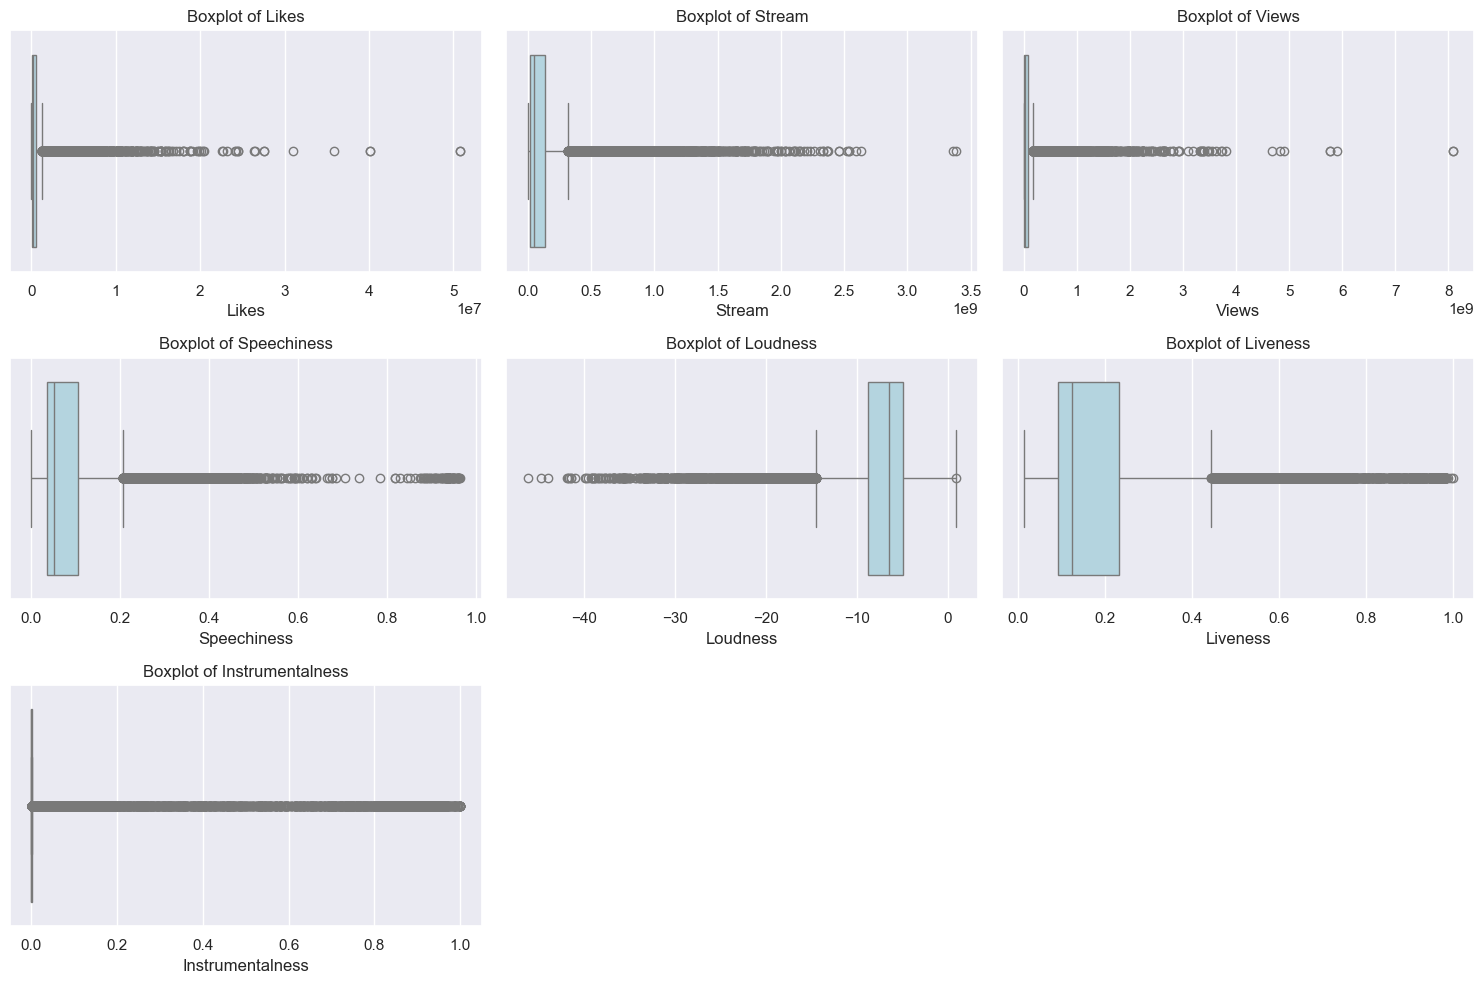

In [45]:
# Aykırı değerlerin bulunduğu sütunları alalım
outlier_columns = ['Likes', 'Stream', 'Views', 'Speechiness', 'Loudness', 
                   'Liveness', 'Instrumentalness']  # Bunlar aykırı değer bulunan sütunlar

# Her bir sütun için boxplot oluşturma
plt.figure(figsize=(15, 10))
for i, column in enumerate(outlier_columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid oluşturuyoruz
    sns.boxplot(x=df[column], color='lightblue')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [46]:
# İlgili sütunları seçiyoruz
columns_to_check = ['Likes', 'Stream', 'Views']

# Aykırı değerleri Z-Score ile bulalım
z_scores = np.abs(stats.zscore(df[columns_to_check]))

# Z-skoru 3'ten büyük olan veriler aykırı değerdir
outliers = (z_scores > 3)

# Aykırı değerlerin toplamını hesaplayalım
total_outliers = np.sum(outliers)

# Her bir sütun için aykırı değerlerin toplamı
outliers_per_column = np.sum(outliers, axis=0)

print(f"Aykırı değerlerin toplamı: {total_outliers}")
print(f"Sütun bazında aykırı değerler:\n{outliers_per_column}")


Aykırı değerlerin toplamı: Likes     364
Stream    507
Views     340
dtype: int64
Sütun bazında aykırı değerler:
Likes     364
Stream    507
Views     340
dtype: int64


In [47]:
# İlgili sütunları seçiyoruz
columns_to_check = ['Likes', 'Stream', 'Views']

# Z-Skorlarını her sütun için hesaplayalım ve aykırı değerleri tespit edelim
df['Likes_zscore'] = np.abs(stats.zscore(df['Likes']))
df['Stream_zscore'] = np.abs(stats.zscore(df['Stream']))
df['Views_zscore'] = np.abs(stats.zscore(df['Views']))

# Z-skoru 3'ten büyük olan verileri aykırı olarak kabul edelim
df_outliers = df[(df['Likes_zscore'] > 3) | (df['Stream_zscore'] > 3) | (df['Views_zscore'] > 3)]

# Aykırı değerleri z-skorlarına göre sıralayalım
df_outliers_sorted = df_outliers.sort_values(by=['Likes_zscore', 'Stream_zscore', 'Views_zscore'], ascending=False)

# En uçtaki 10 aykırı değeri görüntüleyelim
df_outliers_sorted[['Track', 'Artist', 'Likes', 'Stream', 'Views', 'Likes_zscore', 'Stream_zscore', 'Views_zscore']].head(10)


,Track,Artist,Likes,Stream,Views,Likes_zscore,Stream_zscore,Views_zscore
1147,Despacito,Luis Fonsi,50788652.0,1.506598e+09,8.079649e+09,27.766412,5.559057,28.764886
365,Despacito,Daddy Yankee,50788626.0,1.506598e+09,8.079647e+09,27.766398,5.559057,28.764877
14580,See You Again (feat. Charlie Puth),Charlie Puth,40147674.0,1.521255e+09,5.773798e+09,21.871161,5.618550,20.457529
12469,See You Again (feat. Charlie Puth),Wiz Khalifa,40147618.0,1.521255e+09,5.773797e+09,21.871130,5.618550,20.457525
14561,Dynamite,BTS,35892575.0,1.582446e+09,1.640946e+09,19.513776,5.866941,5.567981
12452,Shape of You,Ed Sheeran,31047780.0,3.362005e+09,5.908398e+09,16.829691,13.090566,20.942457
16030,Boy With Luv (feat. Halsey),Halsey,27588224.0,9.894780e+08,1.634110e+09,14.913048,3.459951,5.543353
14565,Boy With Luv (feat. Halsey),BTS,27588189.0,9.894780e+08,1.634110e+09,14.913029,3.459951,5.543352
16668,Faded,Alan Walker,26446178.0,1.683178e+09,3.400742e+09,14.280339,6.275833,11.908049
8937,Gangnam Style (강남스타일),PSY,26399133.0,3.709911e+08,4.679767e+09,14.254275,0.949375,16.516032


***Verimizde bunlar aykırı değer olarak gözüküyor ama bu şarkılar müzik endüstrisinde büyük bir öneme sahip. Eğer genel bir analiz yapıyorsak, bu tür aşırı uç aykırı değerler ortalamaları ve diğer metrikleri etkileyebilir. Ancak bu şarkılar büyük popülerlik kazandıkları için ayrı bir kategori olarak değerlendirilebilir ve analiz dışında bırakılmak yerine, özel olarak incelenebilir. Bundan dolayı datamızdan çıkarmıyoruz.***

# Datamızı manipüle ettik ve EDA'ya başlıyoruz.

# Türe Göre Dağılım

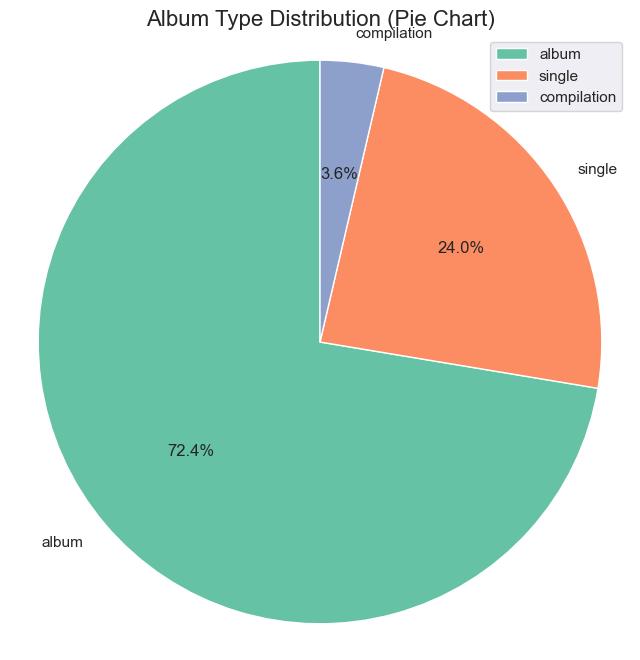

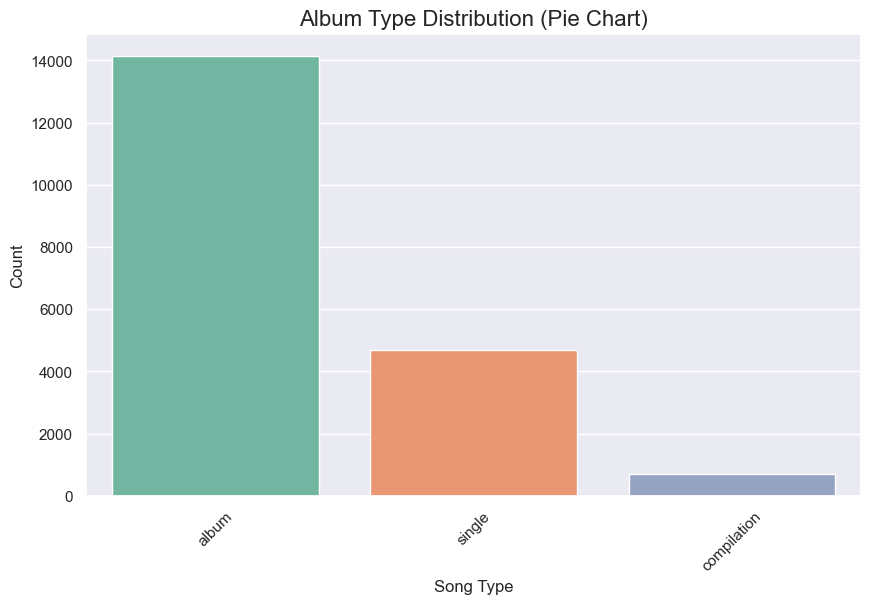

In [79]:
# Albüm Türü Dağılımı için pasta grafik
album_type_count = df['Album Type'].value_counts()
labels = album_type_count.index.tolist()
sizes = album_type_count.values.tolist()

# Pasta grafik
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Album Type Distribution (Pie Chart)', fontsize=16)
plt.axis('equal') 
plt.legend(labels, loc='best')
plt.show()

# Albüm Türü Dağılımı için çubuk grafik
plt.figure(figsize=(10,6))
sns.countplot(x='Album Type', data=df, palette='Set2')
plt.title('Album Type Distribution (Pie Chart)', fontsize=16)
plt.xlabel('Song Type')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()


In [81]:
# Album Type sütunumuzdaki değerleri saydırıp ekrana yazdırıyorum.
album_type_count = df['Album Type'].value_counts()
print(album_type_count)

Album Type
album          14148
single          4689
compilation      712
Name: count, dtype: int64


***Şarkı Türü olarak "Albüm" daha fazla tercih edildiğini gördük Datamızın: 14.000 ile %73 bir kısmı "album"***  

# Şarkı Süresi Dağılımı

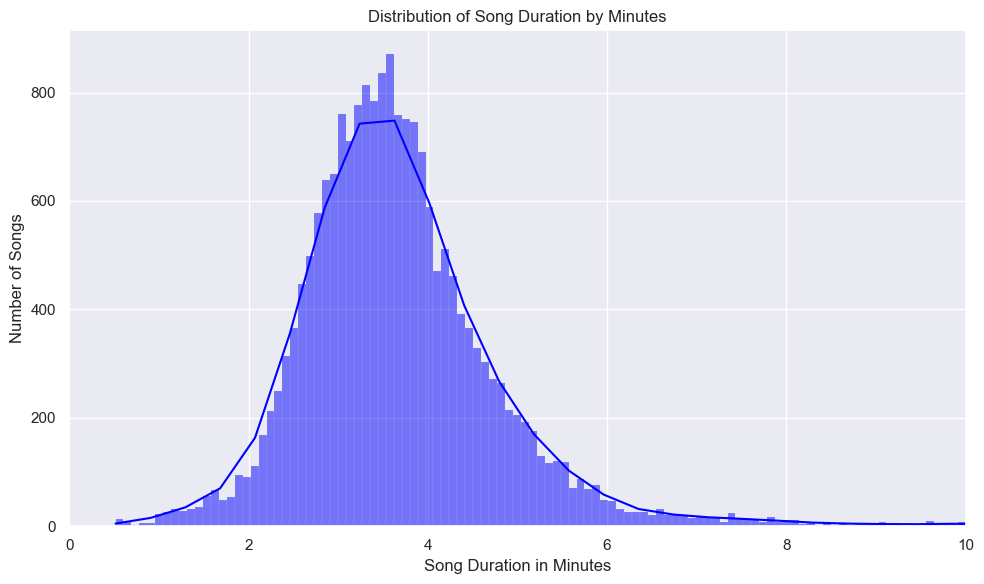

In [85]:
# Şarkı Süresi Dağılımı (Histogram)
fig, ax = plt.subplots(figsize=(10, 6)) 
sns.histplot(data=df, x="Duration_Minutes", ax=ax,kde=True, color='blue')  
ax.set(xlabel='Song Duration in Minutes', 
       ylabel='Number of Songs', 
       title='Distribution of Song Duration by Minutes', 
       xlim=(0, 10))  
plt.tight_layout()
plt.show()


***Aykırı değer varmı diye kontrol ediyoruz.***

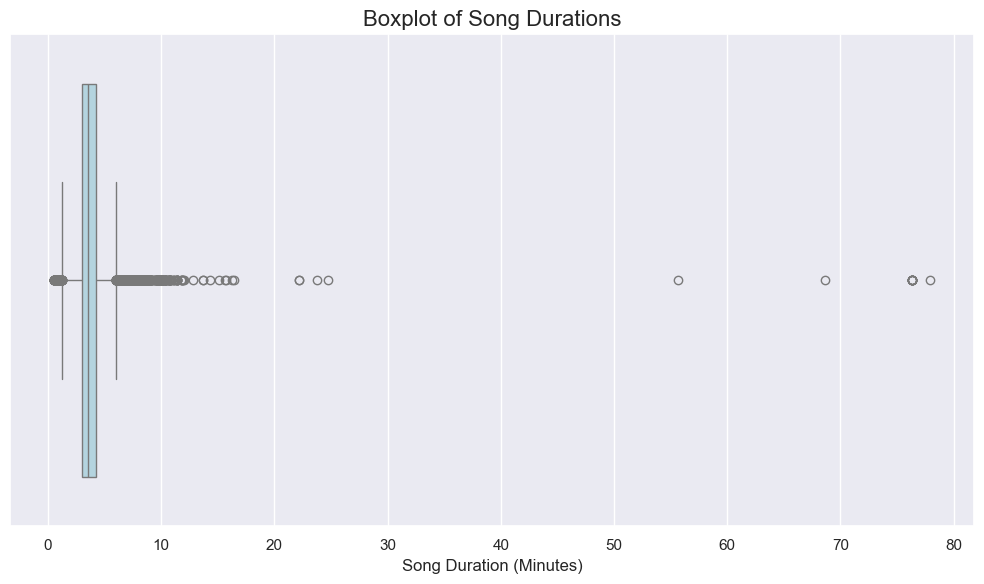

In [87]:
# Şarkı Süresi Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Duration_Minutes'], color='lightblue')

# Grafik başlıkları ve eksen ayarları
plt.title('Boxplot of Song Durations', fontsize=16)
plt.xlabel('Song Duration (Minutes)')
plt.tight_layout()
plt.show()

***Şarkı sürelerinin çoğu ortalama 3 ila 5 dakika arasında değişiyor.Ancak şarkı sürelerinin bir kısmı ciddi şekilde bu aralığın dışına çıkıyor (özellikle 30-80 dakika arası). Bu süreler genellikle standart bir şarkı süresinden oldukça uzun olabilir ve muhtemelen özel projeler, canlı kayıtlar veya albüm parçaları olabilir.Bu aykırı değerler, şarkı sürelerinin genel dağılımını etkileyebilir. Eğer bu tür aykırı değerler analiz sonuçlarını bozmuyorsa, bunları analiz dışında bırakabilirsiniz.Biz ortalama şarkı sürelerini analiz ettik bu sürelerle başka analiz yapmayacağımız için datamızda bırakıyoruz.***

# Korelasyon Matrisi

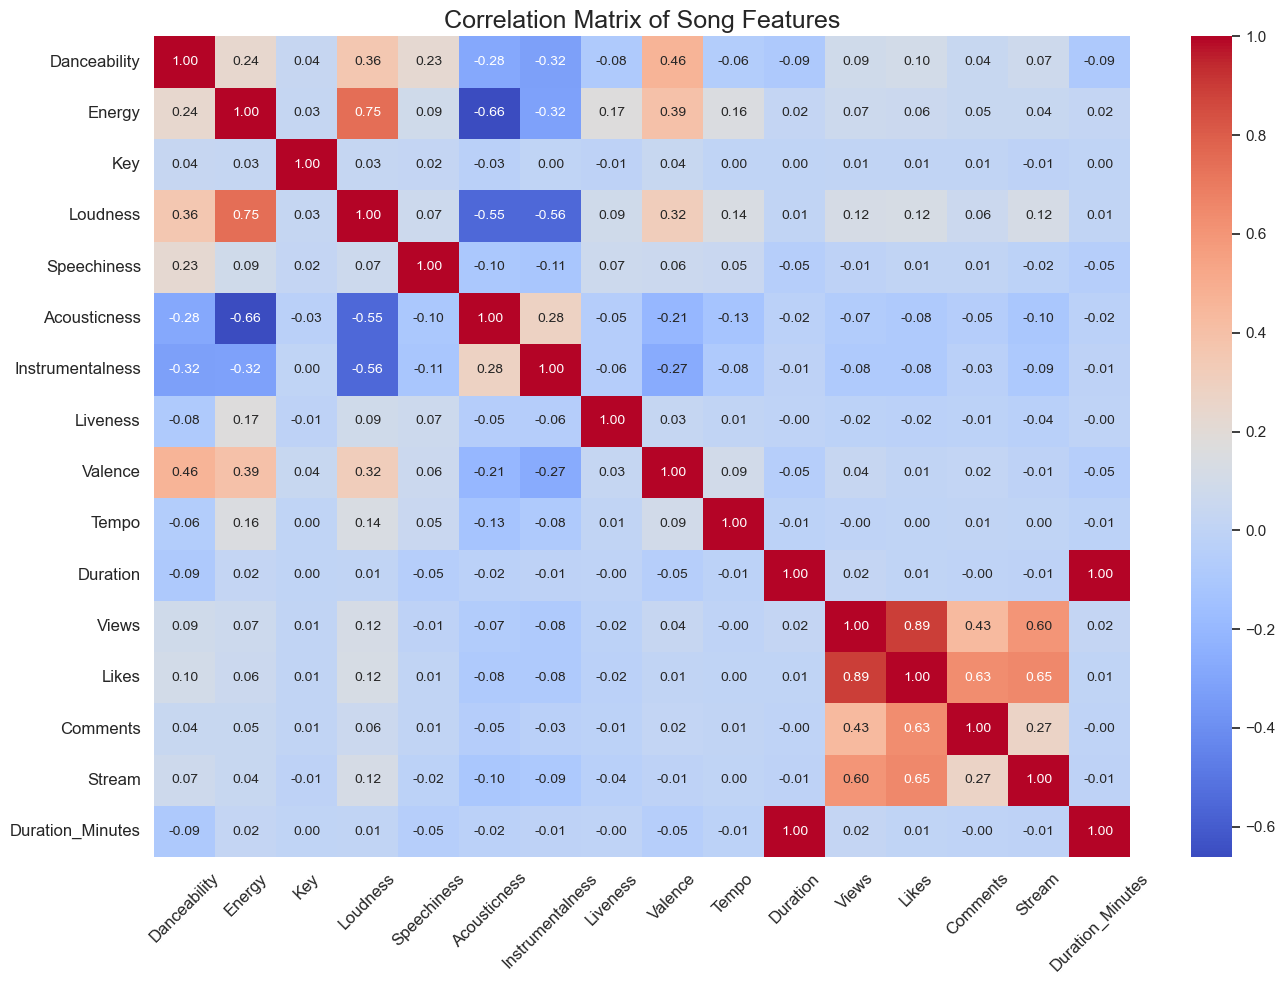

In [90]:
# Z-skoru sütunlarını hariç tutarak yeni bir dataframe oluşturma
numeric_df_clean = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Likes_zscore', 'Stream_zscore', 'Views_zscore'])

# Korelasyon matrisi oluşturma
plt.figure(figsize=(14, 10))  # Daha büyük bir grafik boyutu
sns.heatmap(numeric_df_clean.corr(), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})  

plt.title('Correlation Matrix of Song Features', fontsize=18)
plt.xticks(fontsize=12, rotation=45)  
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Korelasyon matrisi grafiğine bakarak, şarkı özellikleri arasındaki ilişkileri inceleyebiliriz. İşte dikkat çeken bazı noktalar:

1. Views, Likes ve Comments Arasındaki Güçlü İlişki:
Views (İzlenme), Likes (Beğeni) ve Comments (Yorumlar) arasında güçlü bir pozitif korelasyon var.
Views ve Likes arasında 0.89 gibi çok yüksek bir korelasyon var. Bu, izlenme sayısı arttıkça beğeni sayısının da artma eğiliminde olduğunu gösterir.
Likes ve Comments arasında 0.63 korelasyon değeri, beğenilerin artmasının yorum sayısına da etkisi olduğunu gösterir.
Bu metrikler, şarkının popülaritesini doğrudan etkileyen ölçütler gibi görünüyor.
2. Danceability (Dans Edilebilirlik) ve Valence (Pozitiflik) Arasındaki İlişki:
Danceability ve Valence arasında 0.46 gibi orta derecede pozitif bir korelasyon var. Bu, dans edilebilirliğin yüksek olduğu şarkıların daha pozitif duygularla ilişkilendirilebileceğini gösterir.
Bu ilişki, daha mutlu ve enerjik şarkıların dans edilebilir olma eğiliminde olduğunu gösterebilir.
3. Energy (Enerji) ve Loudness (Ses Seviyesi):
Energy ve Loudness arasında oldukça güçlü (0.75) bir pozitif korelasyon var. Yani, yüksek enerjiye sahip şarkılar genellikle daha yüksek ses seviyelerine sahip olma eğilimindedir.
Bu beklenen bir sonuç, çünkü enerjik şarkılar genellikle yüksek ses seviyelerinde daha etkili olur.***
# Genel Yorumlar:
***Popülerlik metrikleri (Views, Likes, Comments) arasında güçlü ilişkiler var, bu da bu metriklerin birbirini doğrudan etkilediğini gösterir.
Dans edilebilirlik, pozitiflik ve enerji gibi özellikler arasında olumlu ilişkiler var; bu, daha enerjik ve pozitif şarkıların dans edilebilir olma eğiliminde olduğunu gösteriyor.
Enerji ve akustik gibi bazı özellikler arasında zıt ilişkiler var, bu da akustik şarkıların genellikle daha düşük enerjiye sahip olduğunu gösteriyor.***

# En Çok İzlenen Şarkılara Göre Sıralama

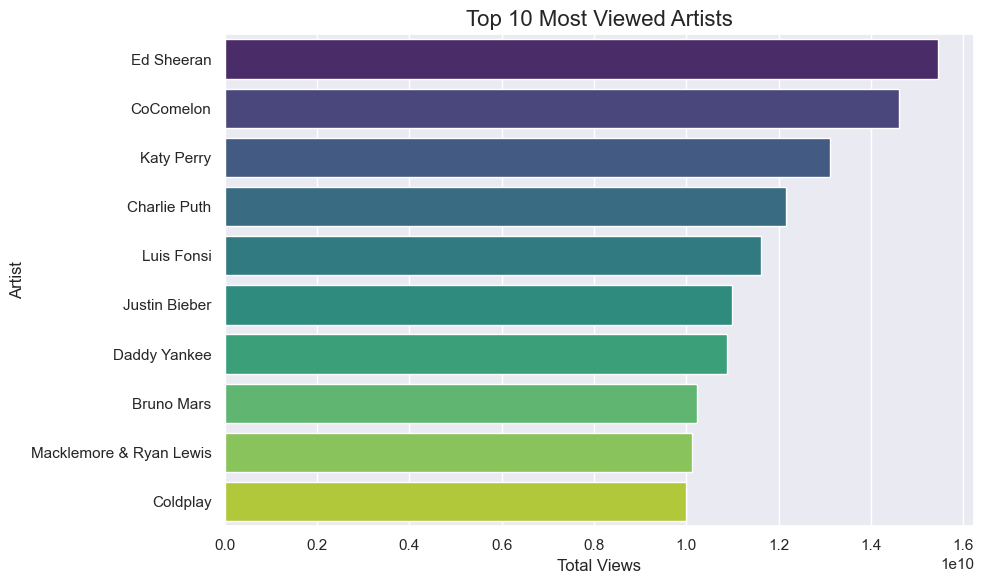

In [93]:
# Sanatçıları Views (izlenme sayısı) bazında gruplandırma ve toplam izlenme sayısına göre sıralama
top_10_artists_views = df.groupby('Artist')['Views'].sum().sort_values(ascending=False).head(10)

# Barplot oluşturma
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_artists_views.values, y=top_10_artists_views.index, palette='viridis')

plt.title('Top 10 Most Viewed Artists', fontsize=16)
plt.xlabel('Total Views', fontsize=12)
plt.ylabel('Artist', fontsize=12)

plt.tight_layout()
plt.show()


***Sanatçının tüm şarkılarının izlenme sayıları toplandığında sıralama bu şekilde oluyor, ancak bu değerlendirme adil değil çünkü sanatçıların farklı sayıda şarkıları olabilir. Bu nedenle, sanatçının en popüler şarkısını bularak izlenme sayılarına göre sıralama yapmak daha mantıklı olacaktır.***

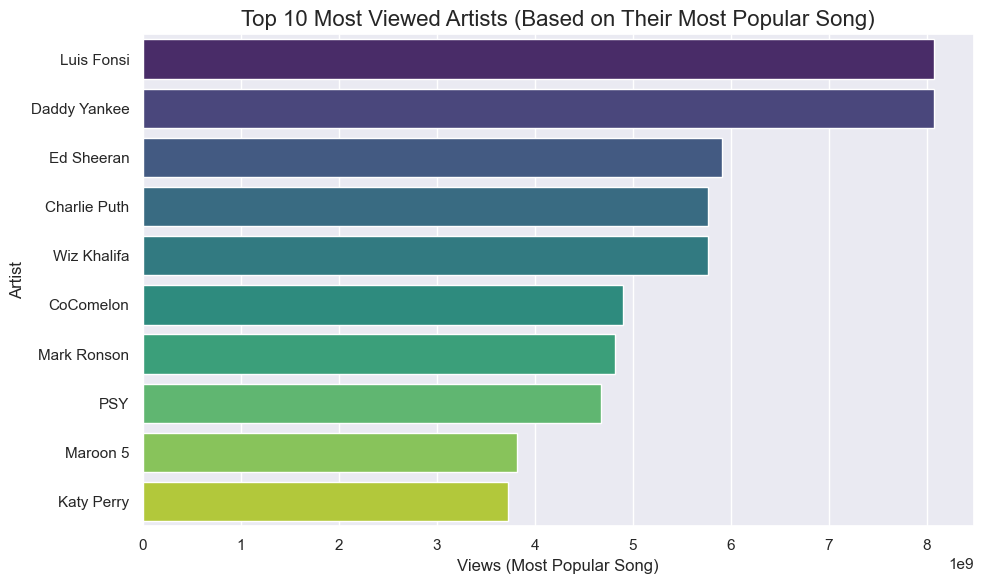

In [95]:
# Her sanatçının en popüler (en çok izlenen) şarkısını bulma
top_songs_per_artist = df.loc[df.groupby('Artist')['Views'].idxmax()]

# En popüler şarkıya göre en yüksek izlenme sayısına sahip 10 sanatçıyı bulma
top_10_artists_views1 = top_songs_per_artist[['Artist', 'Views']].sort_values(by='Views', ascending=False).head(10)

# Barplot oluşturma
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_artists_views1['Views'], y=top_10_artists_views1['Artist'], palette='viridis')

plt.title('Top 10 Most Viewed Artists (Based on Their Most Popular Song)', fontsize=16)
plt.xlabel('Views (Most Popular Song)', fontsize=12)
plt.ylabel('Artist', fontsize=12)

plt.tight_layout()
plt.show()


***Şarkı bazında inceleme yaptığımızda; En Çok izleme alan Sanatçıyı büyükten küçüğe sıraladığımızda 'Luis Fonsi' ve 'Daddy Yankee' olduğunu görüyoruz 'DESPACITO' Şarkısını beraber seslendirmişler izlenme sayısınısı(Views) Sanatçı(Artist) Bazında baktığımız için bu sanatçılar ayrı ayrı ilk sırayı almış durumdalar.'Charlie Puth ve Wiz Khalifa'da durum aynıdır.***

In [98]:
# Her sanatçının en popüler (en çok izlenen) şarkısını bulma
top_songs_per_artist1 = df.loc[df.groupby('Artist')['Views'].idxmax()]

# En popüler şarkıya göre en yüksek izlenme sayısına sahip 10 şarkıyı bulma
top_10_songs_views2 = top_songs_per_artist1[['Artist', 'Track', 'Views']].sort_values(by='Views', ascending=False).head(10)

# En popüler 10 şarkıyı tablo olarak gösterme
print("Top 10 Most Viewed Songs:")
print(top_10_songs_views2[['Artist', 'Track', 'Views']])


Top 10 Most Viewed Songs:
             Artist                               Track         Views
1147     Luis Fonsi                           Despacito  8.079649e+09
365    Daddy Yankee                           Despacito  8.079647e+09
12452    Ed Sheeran                        Shape of You  5.908398e+09
14580  Charlie Puth  See You Again (feat. Charlie Puth)  5.773798e+09
12469   Wiz Khalifa  See You Again (feat. Charlie Puth)  5.773797e+09
20303     CoComelon                   Wheels on the Bus  4.898831e+09
10686   Mark Ronson      Uptown Funk (feat. Bruno Mars)  4.821016e+09
8937            PSY               Gangnam Style (강남스타일)  4.679767e+09
9569       Maroon 5                               Sugar  3.817733e+09
13032    Katy Perry                                Roar  3.725749e+09


***Yukarıdaki durumu kanıtlamak için tablo biçimde gösteriyoruz.***

# Views,Likes,Comments Top 10 Sıralamaları

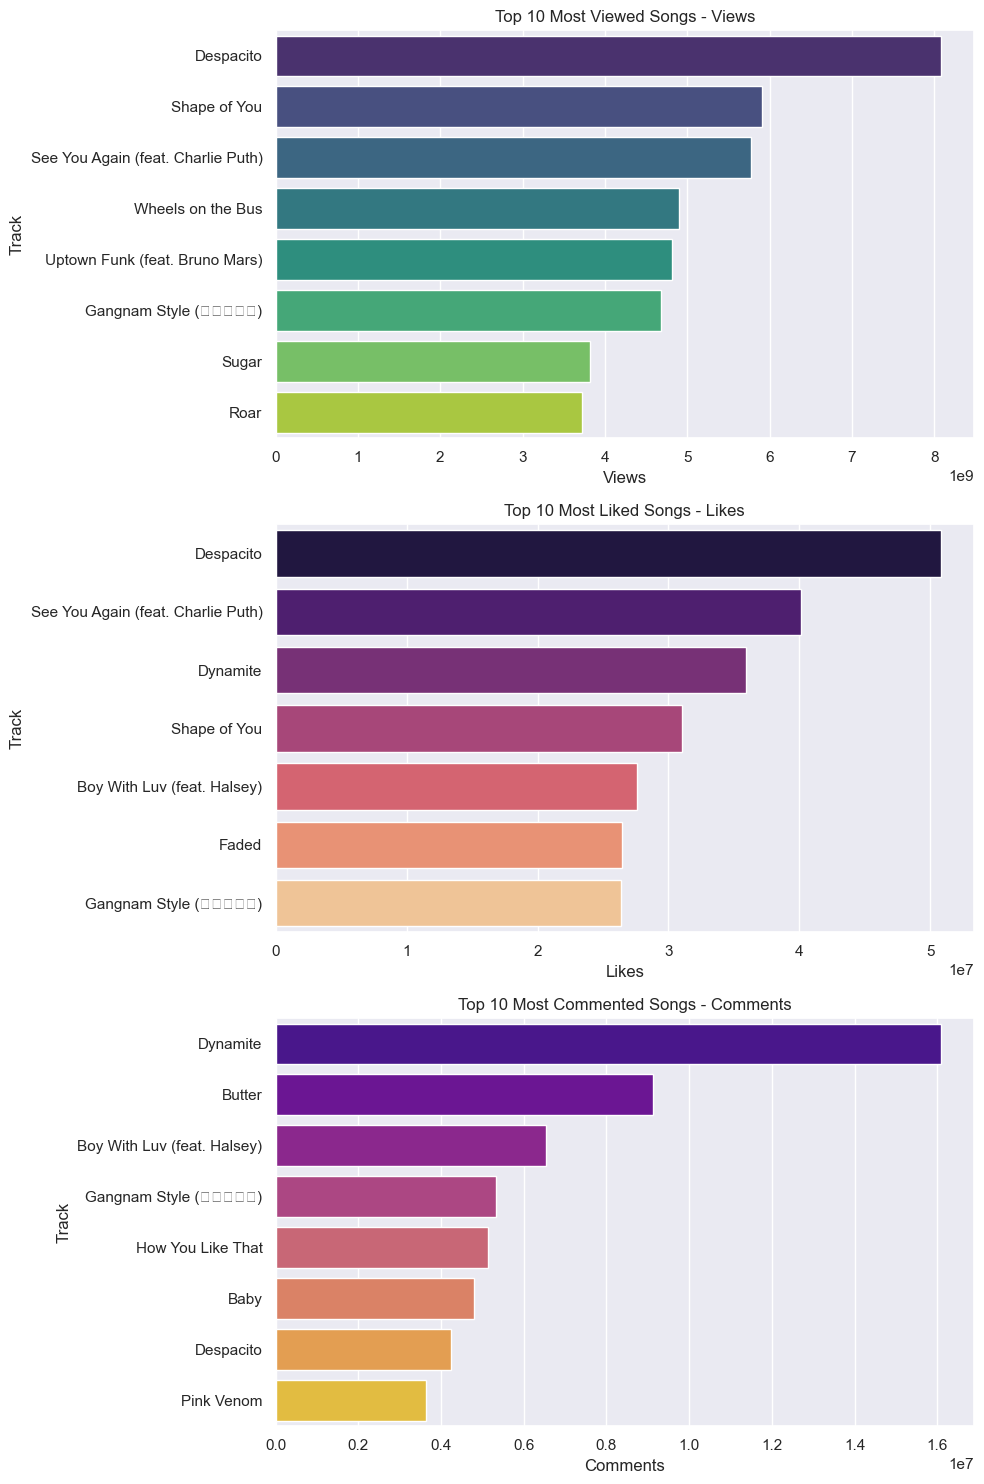

In [102]:
top10_views = df.sort_values(by='Views', ascending=False).head(10)
top10_likes = df.sort_values(by='Likes', ascending=False).head(10)
top10_comments = df.sort_values(by='Comments', ascending=False).head(10)

plt.figure(figsize=(10, 15))

# Views Barplot
plt.subplot(3, 1, 1)
sns.barplot(x=top10_views['Views'], y=top10_views['Track'], palette='viridis')
plt.title('Top 10 Most Viewed Songs - Views')
plt.xlabel('Views')
plt.ylabel('Track')

# Likes Barplot
plt.subplot(3, 1, 2)
sns.barplot(x=top10_likes['Likes'], y=top10_likes['Track'], palette='magma')
plt.title('Top 10 Most Liked Songs - Likes')
plt.xlabel('Likes')
plt.ylabel('Track')

# Comments Barplot
plt.subplot(3, 1, 3)
sns.barplot(x=top10_comments['Comments'], y=top10_comments['Track'], palette='plasma')
plt.title('Top 10 Most Commented Songs - Comments')
plt.xlabel('Comments')
plt.ylabel('Track')

plt.tight_layout()
plt.show()


***En popüler 10 şarkıyı Views(İzlenme) göre bulduk ve değerlendirdik Korelasyon Matrisinde ki Views (İzlenme), Likes (Beğeni) ve Comments (Yorumlar) arasında güçlü bir pozitif korelasyonu analiz etmiş oldum.***

# En Çok Etkileşim Alan Youtube Kanal Analizi

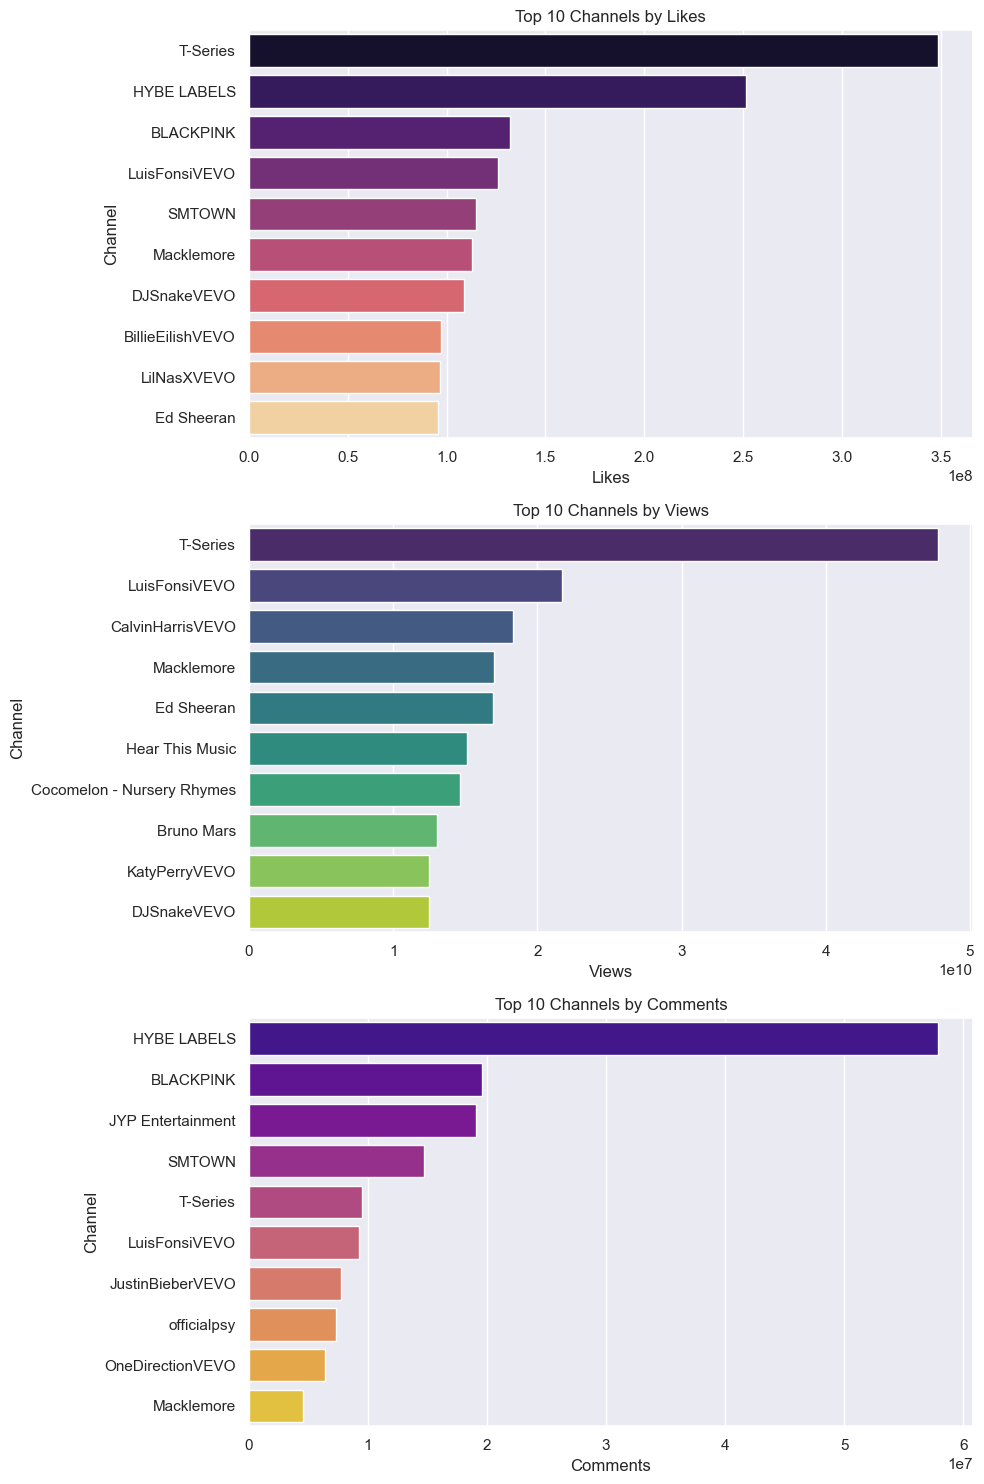

In [105]:
# YouTube verilerini kanal bazında gruplayarak toplam beğeni, izlenme ve yorum sayısını hesaplama
channel_grouped = df.groupby('Channel')[['Likes', 'Views', 'Comments']].sum().reset_index()

# Likes, Views ve Comments sütunlarına göre en çok etkileşim alan 10 kanalı bulma
top_channels_likes = channel_grouped.sort_values(by='Likes', ascending=False).head(10)
top_channels_views = channel_grouped.sort_values(by='Views', ascending=False).head(10)
top_channels_comments = channel_grouped.sort_values(by='Comments', ascending=False).head(10)

# Grafik boyutunu ayarlayalım (alt alta 3 bar grafiği)
plt.figure(figsize=(10, 15))

# Likes Barplot
plt.subplot(3, 1, 1)
sns.barplot(x=top_channels_likes['Likes'], y=top_channels_likes['Channel'], palette='magma')
plt.title('Top 10 Channels by Likes')
plt.xlabel('Likes')
plt.ylabel('Channel')

# Views Barplot
plt.subplot(3, 1, 2)
sns.barplot(x=top_channels_views['Views'], y=top_channels_views['Channel'], palette='viridis')
plt.title('Top 10 Channels by Views')
plt.xlabel('Views')
plt.ylabel('Channel')

# Comments Barplot
plt.subplot(3, 1, 3)
sns.barplot(x=top_channels_comments['Comments'], y=top_channels_comments['Channel'], palette='plasma')
plt.title('Top 10 Channels by Comments')
plt.xlabel('Comments')
plt.ylabel('Channel')

plt.tight_layout()
plt.show()

***Youtube kanalı olarak analiz ettiğimizde izlenme ve beğenide başı çeken kanalın aynı olduğunu görüyoruz.'T-SERIES' kanalı, Hint film ve müzik şirketi. Şirket, özellikle Bollywood filmlerinde kullanılan müzikler ile Hint pop müzikleri üzerine yoğunlaşmıştır.***


***Yorumda 'HYBE LABELS' kanalını öne çıkanlarda görüyoruz.Güney Kore merkezli bir müzik ve eğlence şirketidir.Fazla yorum alma sebeplerinden biri olarak gösterebileceğim sebep 'Hayran Toplulukları'ndan dolayıdır. BTS’in Küresel Popülerliği,K-POP dünyasında fandomlar (hayran toplulukları) son derece aktif ve etkileşimlidir.***

# SPOTIFY SANATÇILARININ DİNLENME SAYILARI

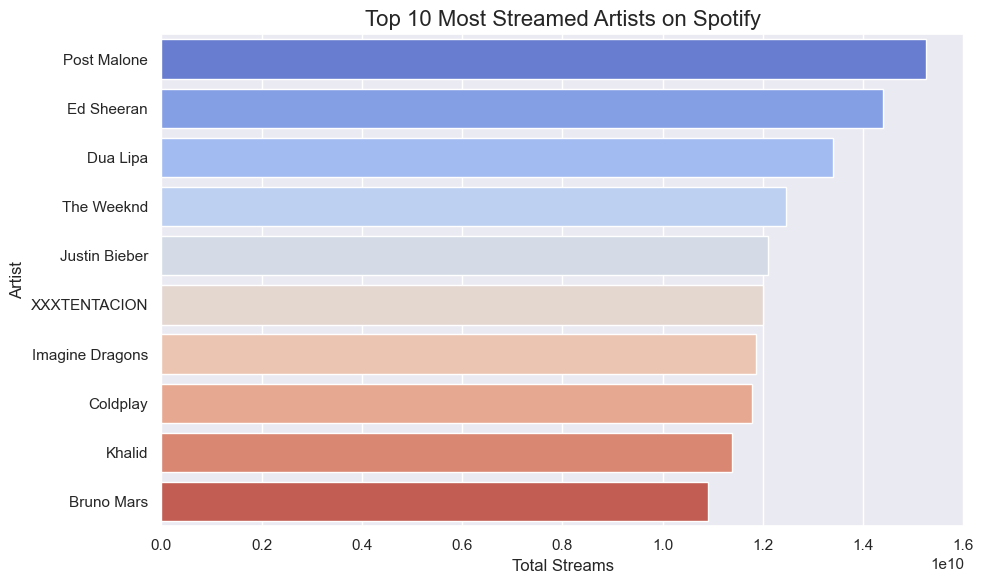

In [109]:
# Spotify sanatçılarını dinlenme sayısına göre gruplama ve toplam dinlenme sayısını hesaplama
artist_streams = df.groupby('Artist')['Stream'].sum().reset_index()

# En çok dinlenen sanatçıları bulma (Top 10)
top_artists_streams = artist_streams.sort_values(by='Stream', ascending=False).head(10)

# Barplot ile görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists_streams['Stream'], y=top_artists_streams['Artist'], palette='coolwarm')

# Grafik başlık ve etiketler
plt.title('Top 10 Most Streamed Artists on Spotify', fontsize=16)
plt.xlabel('Total Streams', fontsize=12)
plt.ylabel('Artist', fontsize=12)

plt.tight_layout()
plt.show()

***Spotify sanatçılarının dinlenme sayıları, Post Malone, Ed Sheeran ve Dua Lipa gibi sanatçılar, milyonlarca dinlenmeye ulaşarak platformda büyük etkileşim sağlamış durumda.Spotify’ın popülerliğini artıran sanatçıların müzik türlerinin çeşitliliği dikkat çekiyor. Hem pop, hem rap, hem de alternatif rock gibi farklı müzik türleri listede temsil ediliyor.***

# İzlenme Sayısına Göre En iyi 10 Şarkının  'Energy', 'Danceability', 'Acousticness'  

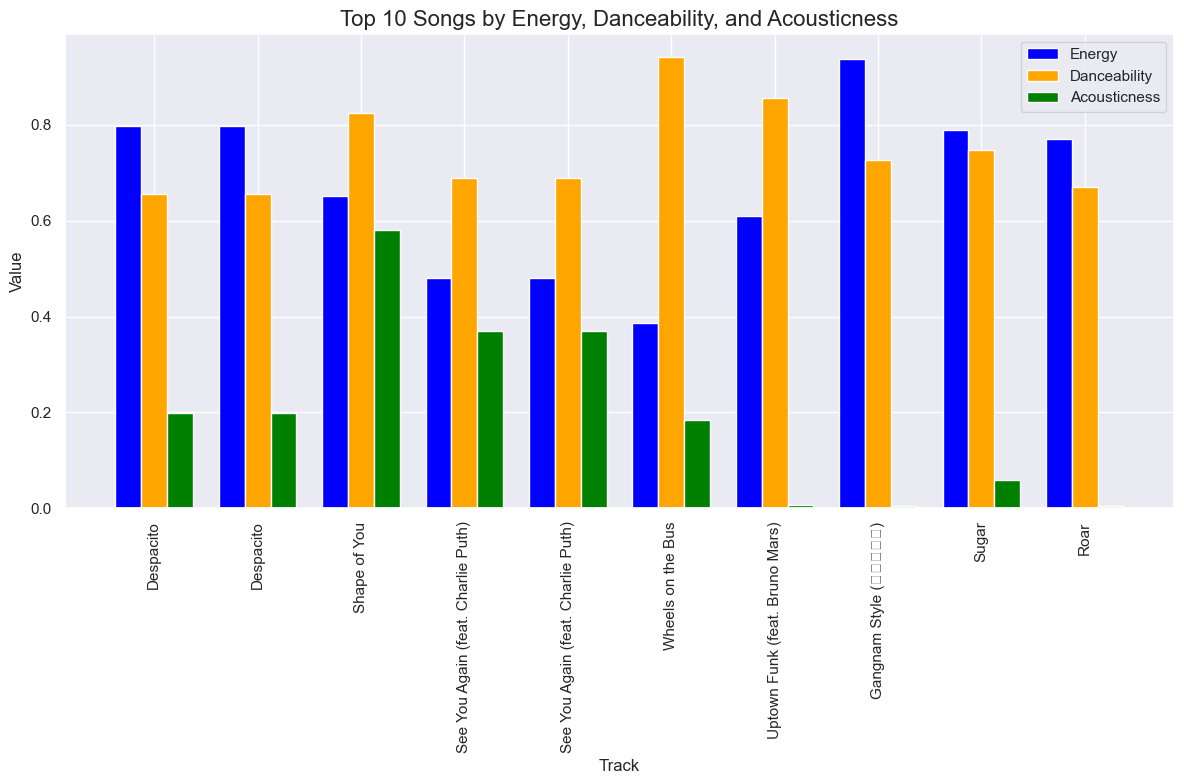

In [139]:
top_10_songs = df[['Track', 'Energy', 'Danceability', 'Acousticness', 'Views']].sort_values(by='Views', ascending=False).head(10)

ind = np.arange(len(top_10_songs))  
width = 0.25  
plt.figure(figsize=(12, 8))

plt.bar(ind - width, top_10_songs['Energy'], width, label='Energy', color='blue')
plt.bar(ind, top_10_songs['Danceability'], width, label='Danceability', color='orange')
plt.bar(ind + width, top_10_songs['Acousticness'], width, label='Acousticness', color='green')

plt.xlabel('Track', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Top 10 Songs by Energy, Danceability, and Acousticness', fontsize=16)
plt.xticks(ind, top_10_songs['Track'], rotation=90)

plt.legend(loc='upper right')
plt.tight_layout()

plt.show()

***Energy ve Danceability genellikle birbiriyle ilişkili gibi görünüyor. Çoğu şarkının hem yüksek enerjisi hem de dansa uygun yapısı var.
Acousticness ise çoğu popüler şarkıda düşük, bu da bu şarkıların çoğunun elektronik müzik veya yapay seslerle desteklendiğini gösteriyor.
Despacito ve Shape of You gibi şarkılar hem yüksek enerjiye hem de dansa uygun yapılara sahipler, bu da onları dünya çapında popüler yapan unsurlardan biri olabilir.***

# Sanatçılara göre Toplam Views ve Stream Sıralaması

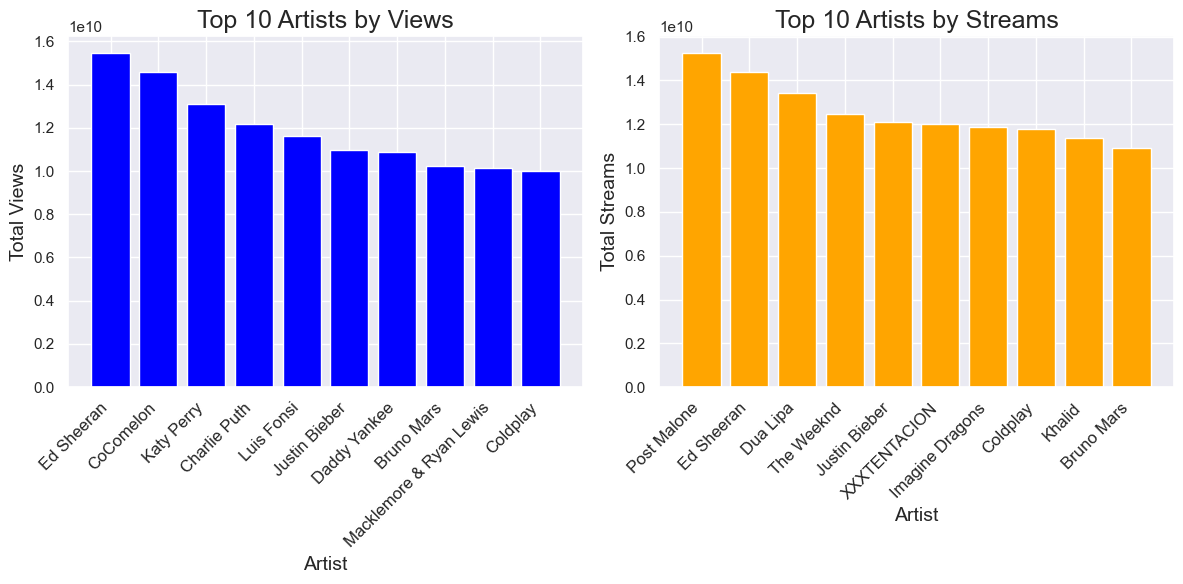

In [141]:
df_views = df.groupby('Artist')['Views'].sum().sort_values(ascending=False)[:10]
df_streams = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False)[:10]

artists_views = df_views.index
artists_streams = df_streams.index

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

# 1. Grafik: Views
ax1.bar(artists_views, df_views, color='blue')
ax1.set_title('Top 10 Artists by Views', fontsize=18)  
ax1.set_xlabel('Artist', fontsize=14)  
ax1.set_ylabel('Total Views', fontsize=14)  
ax1.set_xticklabels(artists_views, rotation=45, ha='right', fontsize=12)  

# 2. Grafik: Streams
ax2.bar(artists_streams, df_streams, color='orange')
ax2.set_title('Top 10 Artists by Streams', fontsize=18)  
ax2.set_xlabel('Artist', fontsize=14)  
ax2.set_ylabel('Total Streams', fontsize=14)  
ax2.set_xticklabels(artists_streams, rotation=45, ha='right', fontsize=12) 

plt.tight_layout()
plt.show()


# Karşılaştırma:
***'Ed Sheeran' her iki platformda da en üst sıralarda yer alıyor, bu da hem YouTube hem de Spotify'da geniş bir kitleye hitap ettiğini gösteriyor.
'CoComelon' YouTube'da oldukça popüler olmasına rağmen, Spotify'da bulunmuyor; bu da içerik türüyle ilgili olabilir (çocuk videoları).
'Post Malone' ve 'Dua Lipa' gibi sanatçılar ise Spotify'da daha ön planda, bu da müzik platformları arasındaki içerik tüketimi farkını gösteriyor.
'Coldplay' her iki platformda da ilk 10'da yer alıyor, bu da geniş bir kitleye hitap eden uzun soluklu bir grup olduklarını gösteriyor.***
# Genel Yorum:
***Bu iki grafik, sanatçıların her iki platformda ne kadar farklı popülariteye sahip olduklarını açıkça gösteriyor. 'Ed Sheeran' gibi bazı sanatçılar her iki platformda da oldukça başarılıyken, 'Post Malone' gibi bazıları sadece bir platformda daha öne çıkıyor.
Aynı zamanda, bu grafikler müzik dinleyicilerinin platform tercihlerini ve içerik tüketim alışkanlıklarını da ortaya koyuyor.***